#**QR-code ссылка на репозиторий в [Github](https://github.com/kubenet/ML_course)**

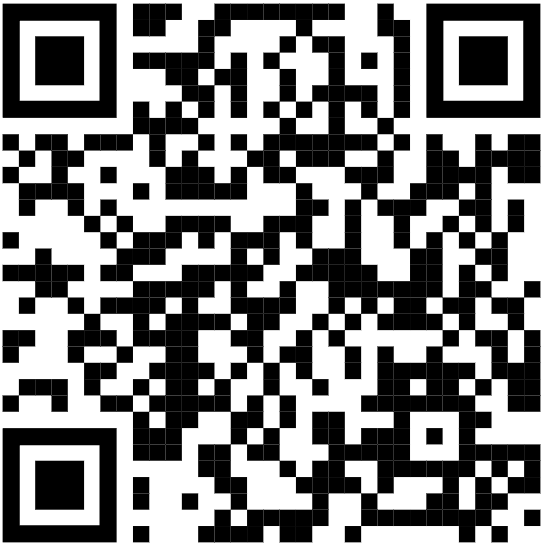

# Практическое занятие №2 — Исследовательский анализ данных (EDA) и визуализация зависимостей

**Дисциплина:** Машинное обучение (Machine Learning)  
**Уровень:** Практикум / Базовый  
**Автор:** Осинцев Артем Викторович

---

# Практическая работа №3: Линейная регрессия и градиентный спуск

## 📋 Цель работы
Изучить принципы работы линейной регрессии, реализовать градиентный спуск с нуля, сравнить различные подходы к обучению модели и проанализировать качество предсказаний на реальных данных.

## 🎯 Задачи
1. Загрузить и подготовить датасет California Housing
2. Реализовать градиентный спуск с нуля
3. Сравнить три подхода к обучению модели
4. Проанализировать качество модели и остатки
5. Интерпретировать коэффициенты модели

---

## 📚 Теоретическая справка

### Линейная регрессия
Модель предсказывает целевую переменную как взвешенную сумму признаков:

$$y = w_1x_1 + w_2x_2 + ... + w_nx_n + b$$

### Функция потерь MSE
$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

### Градиентный спуск
$$w_{new} = w_{old} - \eta \cdot \nabla MSE$$

где $\eta$ — скорость обучения (learning rate)

---

## 🔧 Практическая часть

### Задание 1: Загрузка и подготовка данных






















In [1]:
# Импортируем необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor, HuberRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import time

# Загружаем датасет
california = fetch_california_housing()
X = california.data
y = california.target

# Создаём DataFrame для удобства анализа
df = pd.DataFrame(X, columns=california.feature_names)
df['MedHouseVal'] = y

print(f"Размер датасета: {X.shape}")
print(f"Признаки: {california.feature_names}")
print(f"\nПервые 5 строк:")
print(df.head())

Размер датасета: (20640, 8)
Признаки: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

Первые 5 строк:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [2]:
# Разделяем на обучающую и тестовую выборки (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Обучающая выборка: {X_train.shape}")
print(f"Тестовая выборка: {X_test.shape}")

Обучающая выборка: (16512, 8)
Тестовая выборка: (4128, 8)


In [3]:
# Масштабирование признаков (критически важно для градиентного спуска!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Масштабирование выполнено!")
print(f"Среднее после масштабирования: {np.mean(X_train_scaled, axis=0).round(2)}")
print(f"Стандартное отклонение: {np.std(X_train_scaled, axis=0).round(2)}")

Масштабирование выполнено!
Среднее после масштабирования: [-0. -0.  0. -0. -0. -0.  0. -0.]
Стандартное отклонение: [1. 1. 1. 1. 1. 1. 1. 1.]


---

### Задание 2: Реализация градиентного спуска с нуля

In [4]:
class GradientDescentLinearRegression:
    """
    Реализация линейной регрессии с градиентным спуском с нуля
    """

    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.loss_history = []

    def fit(self, X, y):
        """
        Обучение модели с помощью градиентного спуска
        """
        n_samples, n_features = X.shape

        # Инициализация параметров
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Градиентный спуск
        for i in range(self.n_iterations):
            # Предсказание
            y_pred = np.dot(X, self.weights) + self.bias

            # Вычисление градиентов
            dw = (2/n_samples) * np.dot(X.T, (y_pred - y))
            db = (2/n_samples) * np.sum(y_pred - y)

            # Обновление параметров
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Сохранение истории потерь
            mse = np.mean((y_pred - y) ** 2)
            self.loss_history.append(mse)

            # Вывод прогресса каждые 100 итераций
            if i % 100 == 0:
                print(f"Итерация {i}: MSE = {mse:.4f}")

        return self

    def predict(self, X):
        """
        Предсказание целевой переменной
        """
        return np.dot(X, self.weights) + self.bias

    def score(self, X, y):
        """
        Вычисление R² score
        """
        y_pred = self.predict(X)
        ss_res = np.sum((y - y_pred) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        return 1 - (ss_res / ss_tot)

In [5]:
# Обучаем нашу модель
print("Обучение модели с градиентным спуском...")
start_time = time.time()

gd_model = GradientDescentLinearRegression(learning_rate=0.01, n_iterations=1000)
gd_model.fit(X_train_scaled, y_train)

gd_time = time.time() - start_time
print(f"\nВремя обучения: {gd_time:.4f} секунд")
print(f"Веса модели: {gd_model.weights.round(4)}")
print(f"Смещение (bias): {gd_model.bias:.4f}")

Обучение модели с градиентным спуском...
Итерация 0: MSE = 5.6297
Итерация 100: MSE = 0.7104
Итерация 200: MSE = 0.5953
Итерация 300: MSE = 0.5732
Итерация 400: MSE = 0.5584
Итерация 500: MSE = 0.5477
Итерация 600: MSE = 0.5398
Итерация 700: MSE = 0.5341
Итерация 800: MSE = 0.5299
Итерация 900: MSE = 0.5269

Время обучения: 1.9266 секунд
Веса модели: [ 0.8581  0.1502 -0.2525  0.281   0.0071 -0.0434 -0.6832 -0.6542]
Смещение (bias): 2.0719


---

### Задание 3: Визуализация сходимости градиентного спуска


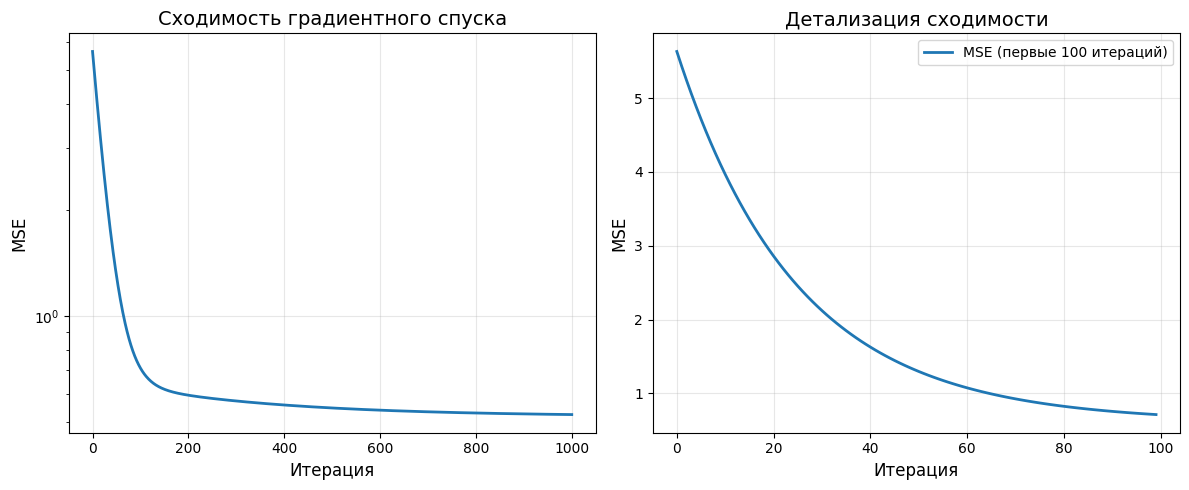

In [6]:
# График сходимости (изменение MSE по эпохам)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(gd_model.loss_history, linewidth=2)
plt.xlabel('Итерация', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.title('Сходимость градиентного спуска', fontsize=14)
plt.grid(True, alpha=0.3)
plt.yscale('log')

# График изменения весов
plt.subplot(1, 2, 2)
weights_history = np.array(gd_model.loss_history)
plt.plot(weights_history[:100], linewidth=2, label='MSE (первые 100 итераций)')
plt.xlabel('Итерация', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.title('Детализация сходимости', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

In [7]:
# Интерактивная визуализация влияния learning rate
from ipywidgets import interact, FloatSlider, IntSlider

def plot_gradient_descent_interactive(learning_rate=0.01, n_iterations=100):
    """
    Интерактивная демонстрация влияния параметров на сходимость
    """
    model = GradientDescentLinearRegression(
        learning_rate=learning_rate,
        n_iterations=n_iterations
    )
    model.fit(X_train_scaled[:100], y_train[:100])  # Используем подвыборку для скорости

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(model.loss_history, linewidth=2, color='blue')
    plt.xlabel('Итерация', fontsize=12)
    plt.ylabel('MSE', fontsize=12)
    plt.title(f'LR={learning_rate}, Iter={n_iterations}', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.yscale('log')

    plt.subplot(1, 2, 2)
    plt.bar(range(len(model.weights)), model.weights, color='green', alpha=0.7)
    plt.xlabel('Признак', fontsize=12)
    plt.ylabel('Вес', fontsize=12)
    plt.title('Веса модели', fontsize=14)
    plt.grid(True, alpha=0.3, axis='y')

    plt.tight_layout()
    plt.show()

    print(f"Финальное MSE: {model.loss_history[-1]:.4f}")
    print(f"R² score: {model.score(X_train_scaled[:100], y_train[:100]):.4f}")

# Создаём интерактивный виджет
interact(plot_gradient_descent_interactive,
         learning_rate=FloatSlider(value=0.01, min=0.001, max=0.1, step=0.001),
         n_iterations=IntSlider(value=100, min=10, max=500, step=10));

interactive(children=(FloatSlider(value=0.01, description='learning_rate', max=0.1, min=0.001, step=0.001), In…

---

### Задание 4: Сравнение трёх подходов

In [14]:
# 1. Градиентный спуск (наша реализация)
start_time = time.time()
gd_model = GradientDescentLinearRegression(learning_rate=0.01, n_iterations=1000)
gd_model.fit(X_train_scaled, y_train)
gd_pred = gd_model.predict(X_test_scaled)
gd_time = time.time() - start_time

# 2. Нормальное уравнение (аналитическое решение)
start_time = time.time()
X_train_bias = np.column_stack([np.ones(X_train_scaled.shape[0]), X_train_scaled])
# w = (X^T X)^(-1) X^T y
normal_weights = np.linalg.inv(X_train_bias.T.dot(X_train_bias)).dot(X_train_bias.T).dot(y_train)
normal_pred = np.column_stack([np.ones(X_test_scaled.shape[0]), X_test_scaled]).dot(normal_weights)
normal_time = time.time() - start_time

# 3. LinearRegression из sklearn
start_time = time.time()
sklearn_model = LinearRegression()
sklearn_model.fit(X_train_scaled, y_train)
sklearn_pred = sklearn_model.predict(X_test_scaled)
sklearn_time = time.time() - start_time

# Сравниваем результаты
print("=" * 70)
print("СРАВНЕНИЕ ТРЁХ ПОДХОДОВ")
print("=" * 70)

methods = ['Градиентный спуск', 'Нормальное уравнение', 'sklearn LinearRegression']
times = [gd_time, normal_time, sklearn_time]
mse_scores = [
    mean_squared_error(y_test, gd_pred),
    mean_squared_error(y_test, normal_pred),
    mean_squared_error(y_test, sklearn_pred)
]
r2_scores = [
    r2_score(y_test, gd_pred),
    r2_score(y_test, normal_pred),
    r2_score(y_test, sklearn_pred)
]

comparison_df = pd.DataFrame({
    'Метод': methods,
    'Время (сек)': [f'{t:.4f}' for t in times],
    'MSE': [f'{m:.4f}' for m in mse_scores],
    'R²': [f'{r:.4f}' for r in r2_scores]
})

print(comparison_df.to_string(index=False))
print("=" * 70)

Итерация 0: MSE = 5.6297
Итерация 100: MSE = 0.7104
Итерация 200: MSE = 0.5953
Итерация 300: MSE = 0.5732
Итерация 400: MSE = 0.5584
Итерация 500: MSE = 0.5477
Итерация 600: MSE = 0.5398
Итерация 700: MSE = 0.5341
Итерация 800: MSE = 0.5299
Итерация 900: MSE = 0.5269
СРАВНЕНИЕ ТРЁХ ПОДХОДОВ
                   Метод Время (сек)    MSE     R²
       Градиентный спуск      0.2065 0.5546 0.5768
    Нормальное уравнение      0.0025 0.5559 0.5758
sklearn LinearRegression      0.0109 0.5559 0.5758


In [15]:
# ============================================================================
# ПРИМЕР:  предсказаний линейной регрессии
# ============================================================================

# 1. Импортируем необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Настройка стиля графиков
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 5)


In [16]:
# ============================================================================
# 2. Загрузка и подготовка данных
# ============================================================================

print("=" * 70)
print("ЗАГРУЗКА ДАННЫХ")
print("=" * 70)

# Загружаем датасет California Housing
california = fetch_california_housing()
X = california.data
y = california.target

print(f"Размер датасета: {X.shape}")
print(f"Количество признаков: {X.shape[1]}")
print(f"Признаки: {california.feature_names[:3]}...")  # Первые 3 признака

ЗАГРУЗКА ДАННЫХ
Размер датасета: (20640, 8)
Количество признаков: 8
Признаки: ['MedInc', 'HouseAge', 'AveRooms']...


In [17]:
# ============================================================================
# 3. Разделение на обучающую и тестовую выборки
# ============================================================================

print("\n" + "=" * 70)
print("РАЗДЕЛЕНИЕ ДАННЫХ")
print("=" * 70)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 20% данных в тестовую выборку
    random_state=42     # Для воспроизводимости результатов
)

print(f"Обучающая выборка: {X_train.shape}")
print(f"Тестовая выборка: {X_test.shape}")


РАЗДЕЛЕНИЕ ДАННЫХ
Обучающая выборка: (16512, 8)
Тестовая выборка: (4128, 8)


In [18]:
# ============================================================================
# 4. Масштабирование признаков (важно для градиентного спуска!)
# ============================================================================

print("\n" + "=" * 70)
print("МАСШТАБИРОВАНИЕ ПРИЗНАКОВ")
print("=" * 70)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Среднее после масштабирования: {np.mean(X_train_scaled, axis=0).round(2)}")
print(f"Стандартное отклонение: {np.std(X_train_scaled, axis=0).round(2)}")


МАСШТАБИРОВАНИЕ ПРИЗНАКОВ
Среднее после масштабирования: [-0. -0.  0. -0. -0. -0.  0. -0.]
Стандартное отклонение: [1. 1. 1. 1. 1. 1. 1. 1.]


In [19]:
# ============================================================================
# 5. Обучение модели линейной регрессии
# ============================================================================

print("\n" + "=" * 70)
print("ОБУЧЕНИЕ МОДЕЛИ")
print("=" * 70)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

print(f"Свободный член (intercept): {model.intercept_:.4f}")
print(f"Коэффициенты (coef): {model.coef_[:3]}...")  # Первые 3 коэффициента


ОБУЧЕНИЕ МОДЕЛИ
Свободный член (intercept): 2.0719
Коэффициенты (coef): [ 0.85438303  0.12254624 -0.29441013]...


In [20]:
# ============================================================================
# 6. Предсказание на тестовой выборке
# ============================================================================

print("\n" + "=" * 70)
print("ПРЕДСКАЗАНИЕ")
print("=" * 70)

# ВОТ ЗДЕСЬ ОПРЕДЕЛЯЕМ y_pred - это отсутствовало в вашем коде!
y_pred = model.predict(X_test_scaled)

print(f"Количество предсказаний: {len(y_pred)}")
print(f"Диапазон предсказаний: [{y_pred.min():.2f}, {y_pred.max():.2f}]")


ПРЕДСКАЗАНИЕ
Количество предсказаний: 4128
Диапазон предсказаний: [-1.01, 11.50]


In [21]:
# ============================================================================
# 7. Оценка качества модели
# ============================================================================

print("\n" + "=" * 70)
print("МЕТРИКИ КАЧЕСТВА")
print("=" * 70)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MSE (Mean Squared Error):     {mse:.4f}")
print(f"RMSE (Root MSE):              {rmse:.4f}")
print(f"MAE (Mean Absolute Error):    {mae:.4f}")
print(f"R² Score:                     {r2:.4f}")


МЕТРИКИ КАЧЕСТВА
MSE (Mean Squared Error):     0.5559
RMSE (Root MSE):              0.7456
MAE (Mean Absolute Error):    0.5332
R² Score:                     0.5758



ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ


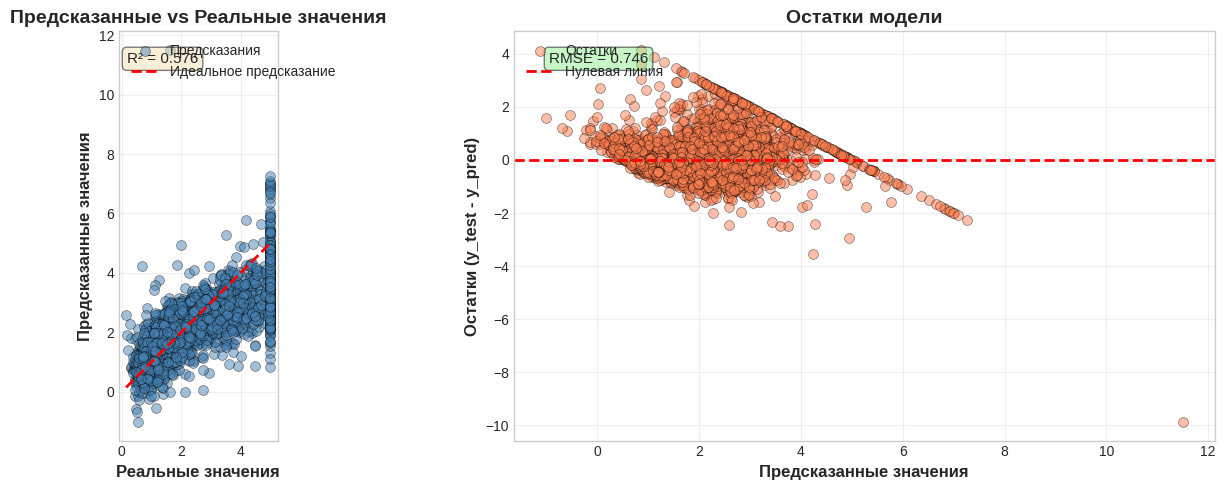

In [22]:
# ============================================================================
# 8. ВИЗУАЛИЗАЦИЯ: Предсказанные vs Реальные значения + Остатки
# ============================================================================

print("\n" + "=" * 70)
print("ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ")
print("=" * 70)

# Вычисляем остатки (residuals)
residuals = y_test - y_pred

# Создаём фигуру с двумя подграфиками
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# -----------------------------------------------------------------------------
# График 1: Предсказанные vs Реальные значения
# -----------------------------------------------------------------------------
axes[0].scatter(y_test, y_pred, alpha=0.5, edgecolors='black', linewidth=0.5,
                color='steelblue', s=50, label='Предсказания')
axes[0].plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()],
             'r--', linewidth=2, label='Идеальное предсказание')
axes[0].set_xlabel('Реальные значения', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Предсказанные значения', fontsize=12, fontweight='bold')
axes[0].set_title('Предсказанные vs Реальные значения', fontsize=14, fontweight='bold')
axes[0].legend(loc='upper left')
axes[0].grid(True, alpha=0.3)
axes[0].set_aspect('equal', adjustable='box')

# Добавляем метрику R² на график
axes[0].text(0.05, 0.95, f'R² = {r2:.3f}', transform=axes[0].transAxes,
             fontsize=11, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# -----------------------------------------------------------------------------
# График 2: Остатки модели (Residual Plot)
# -----------------------------------------------------------------------------
axes[1].scatter(y_pred, residuals, alpha=0.5, edgecolors='black', linewidth=0.5,
                color='coral', s=50, label='Остатки')
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2, label='Нулевая линия')
axes[1].set_xlabel('Предсказанные значения', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Остатки (y_test - y_pred)', fontsize=12, fontweight='bold')
axes[1].set_title('Остатки модели', fontsize=14, fontweight='bold')
axes[1].legend(loc='upper left')
axes[1].grid(True, alpha=0.3)

# Добавляем метрику RMSE на график
axes[1].text(0.05, 0.95, f'RMSE = {rmse:.3f}', transform=axes[1].transAxes,
             fontsize=11, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))

plt.tight_layout()
plt.show()


АНАЛИЗ ОСТАТКОВ


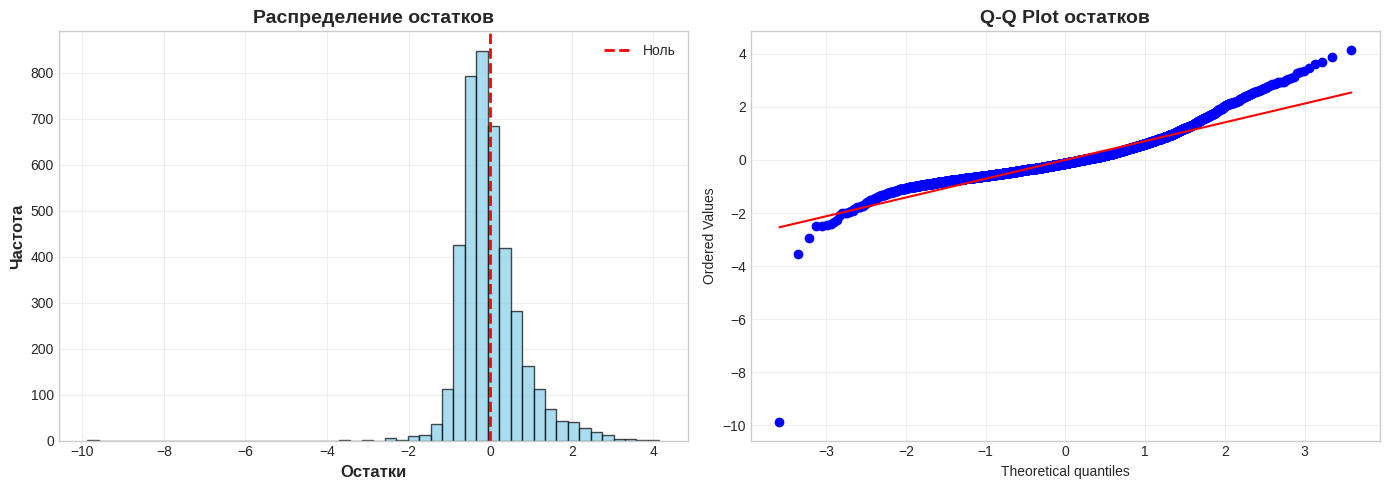


Тест Шапиро-Уилка на нормальность остатков:
Статистика: 0.9022
P-value: 0.0000
✗ Остатки НЕ распределены нормально (p ≤ 0.05)


In [23]:
# ============================================================================
# 9. Дополнительная визуализация: Распределение остатков
# ============================================================================

print("\n" + "=" * 70)
print("АНАЛИЗ ОСТАТКОВ")
print("=" * 70)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Гистограмма распределения остатков
axes[0].hist(residuals, bins=50, edgecolor='black', alpha=0.7, color='skyblue')
axes[0].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Ноль')
axes[0].set_xlabel('Остатки', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Частота', fontsize=12, fontweight='bold')
axes[0].set_title('Распределение остатков', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Q-Q plot для проверки нормальности
from scipy import stats
stats.probplot(residuals, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot остатков', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Статистический тест на нормальность (Шапиро-Уилка)
from scipy.stats import shapiro
stat, p_value = shapiro(residuals[:5000])  # Берём подвыборку для скорости
print(f"\nТест Шапиро-Уилка на нормальность остатков:")
print(f"Статистика: {stat:.4f}")
print(f"P-value: {p_value:.4f}")
if p_value > 0.05:
    print("✓ Остатки распределены нормально (p > 0.05)")
else:
    print("✗ Остатки НЕ распределены нормально (p ≤ 0.05)")


ИНТЕРПРЕТАЦИЯ КОЭФФИЦИЕНТОВ
   Признак  Коэффициент       Влияние
  Latitude    -0.896929 Отрицательное
 Longitude    -0.869842 Отрицательное
    MedInc     0.854383 Положительное
 AveBedrms     0.339259 Положительное
  AveRooms    -0.294410 Отрицательное
  HouseAge     0.122546 Положительное
  AveOccup    -0.040829 Отрицательное
Population    -0.002308 Отрицательное

Смещение (Intercept): 2.0719


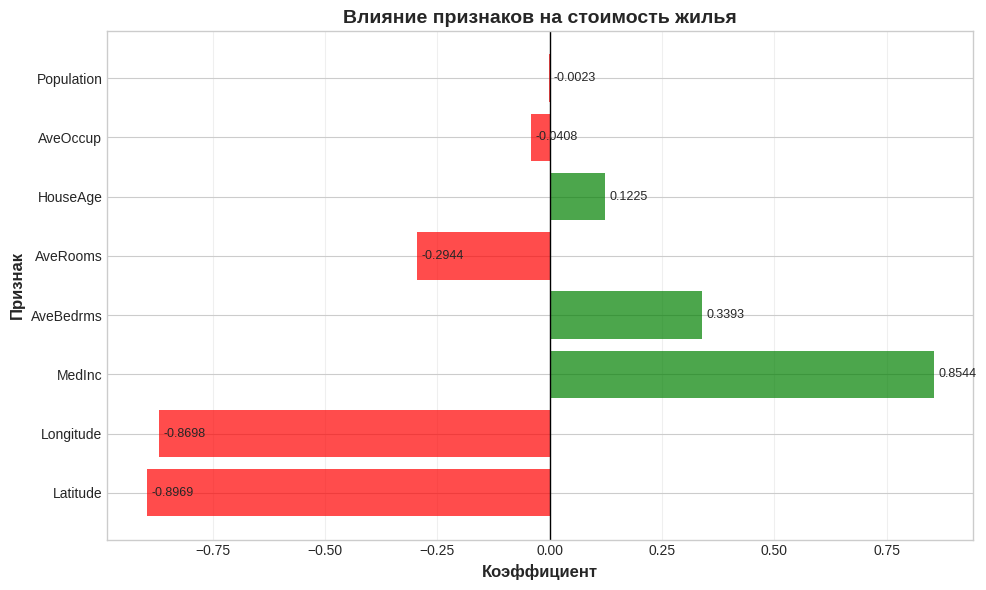

In [24]:
# ============================================================================
# 10. Интерпретация коэффициентов модели
# ============================================================================

print("\n" + "=" * 70)
print("ИНТЕРПРЕТАЦИЯ КОЭФФИЦИЕНТОВ")
print("=" * 70)

coef_df = pd.DataFrame({
    'Признак': california.feature_names,
    'Коэффициент': model.coef_,
    'Влияние': ['Положительное' if coef > 0 else 'Отрицательное' for coef in model.coef_]
})

coef_df = coef_df.sort_values('Коэффициент', key=abs, ascending=False)

print(coef_df.to_string(index=False))
print(f"\nСмещение (Intercept): {model.intercept_:.4f}")

# Визуализация важности признаков
plt.figure(figsize=(10, 6))
colors = ['green' if coef > 0 else 'red' for coef in coef_df['Коэффициент']]
plt.barh(coef_df['Признак'], coef_df['Коэффициент'], color=colors, alpha=0.7)
plt.xlabel('Коэффициент', fontsize=12, fontweight='bold')
plt.ylabel('Признак', fontsize=12, fontweight='bold')
plt.title('Влияние признаков на стоимость жилья', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=1)
plt.grid(True, alpha=0.3, axis='x')

for i, v in enumerate(coef_df['Коэффициент']):
    plt.text(v + 0.01, i, f'{v:.4f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("=" * 70)

---

### Задание 5: Оценка качества модели на тестовой выборке




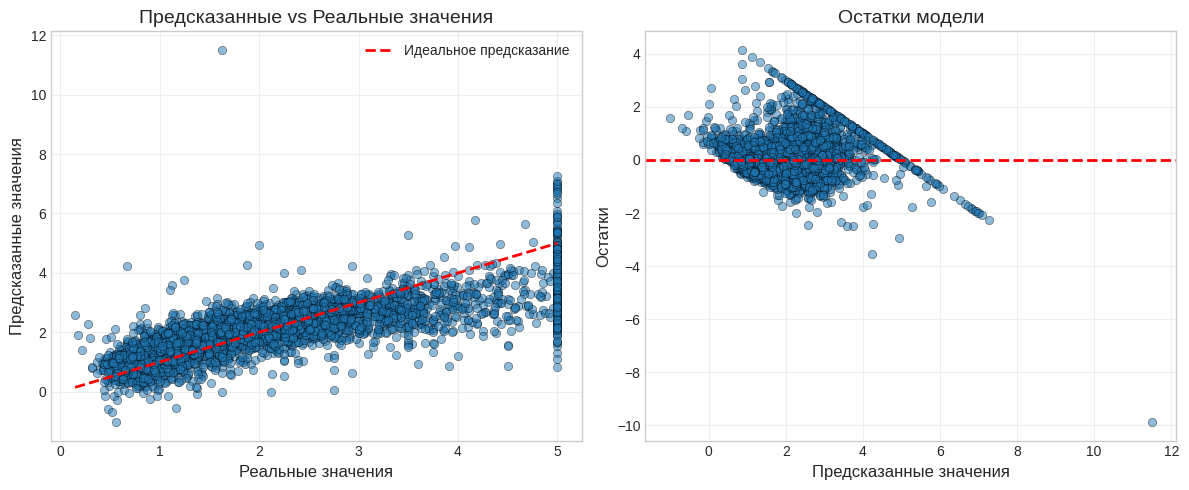

In [25]:
# График предсказанных против реальных значений
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5, edgecolors='black', linewidth=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label='Идеальное предсказание')
plt.xlabel('Реальные значения', fontsize=12)
plt.ylabel('Предсказанные значения', fontsize=12)
plt.title('Предсказанные vs Реальные значения', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5, edgecolors='black', linewidth=0.5)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Предсказанные значения', fontsize=12)
plt.ylabel('Остатки', fontsize=12)
plt.title('Остатки модели', fontsize=14)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [26]:
# Используем лучшую модель (sklearn LinearRegression)
y_pred = sklearn_pred

# Вычисляем все метрики
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print("=" * 70)
print("МЕТРИКИ КАЧЕСТВА МОДЕЛИ")
print("=" * 70)
print(f"MSE (Mean Squared Error):     {mse:.4f}")
print(f"RMSE (Root MSE):              {rmse:.4f}")
print(f"MAE (Mean Absolute Error):    {mae:.4f}")
print(f"R² Score:                     {r2:.4f}")
print("=" * 70)


МЕТРИКИ КАЧЕСТВА МОДЕЛИ
MSE (Mean Squared Error):     0.5559
RMSE (Root MSE):              0.7456
MAE (Mean Absolute Error):    0.5332
R² Score:                     0.5758


---

### Задание 6: Анализ остатков

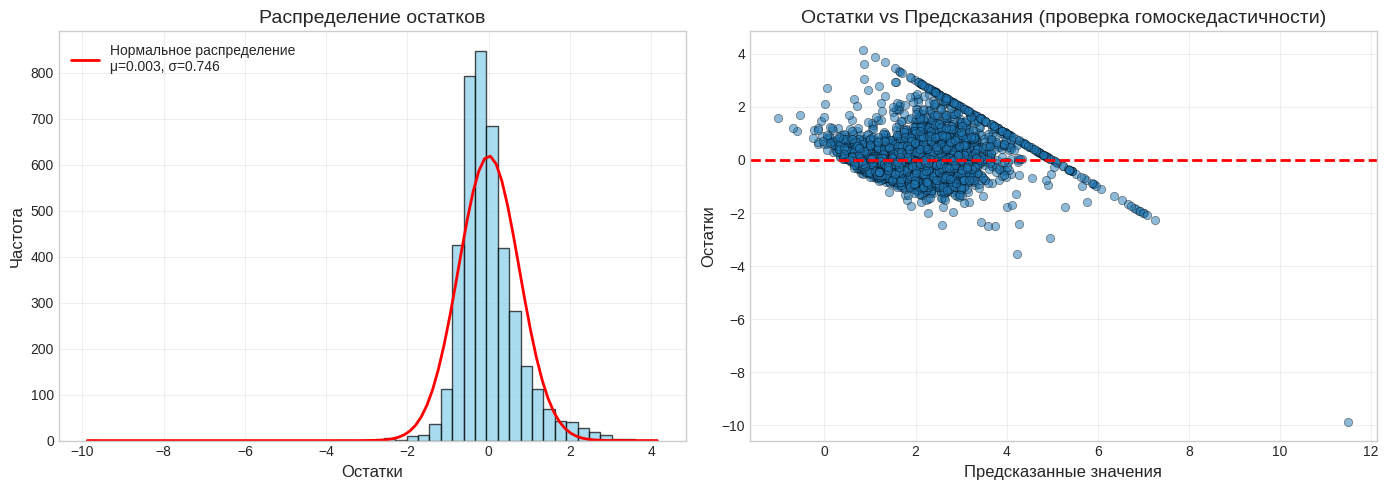


Тест Шапиро-Уилка на нормальность остатков:
Статистика: 0.9022
P-value: 0.0000
✗ Остатки НЕ распределены нормально (p ≤ 0.05)


In [27]:
# Гистограмма распределения остатков
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(residuals, bins=50, edgecolor='black', alpha=0.7, color='skyblue')
plt.xlabel('Остатки', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.title('Распределение остатков', fontsize=14)
plt.grid(True, alpha=0.3)

# Добавляем кривую нормального распределения
from scipy import stats
mu, sigma = stats.norm.fit(residuals)
x = np.linspace(residuals.min(), residuals.max(), 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma) * len(residuals) * (residuals.max() - residuals.min()) / 50,
         'r-', linewidth=2, label=f'Нормальное распределение\nμ={mu:.3f}, σ={sigma:.3f}')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_pred, residuals, alpha=0.5, edgecolors='black', linewidth=0.5)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Предсказанные значения', fontsize=12)
plt.ylabel('Остатки', fontsize=12)
plt.title('Остатки vs Предсказания (проверка гомоскедастичности)', fontsize=14)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Статистический тест на нормальность
from scipy.stats import shapiro
stat, p_value = shapiro(residuals[:5000])  # Берём подвыборку для скорости
print(f"\nТест Шапиро-Уилка на нормальность остатков:")
print(f"Статистика: {stat:.4f}")
print(f"P-value: {p_value:.4f}")
if p_value > 0.05:
    print("✓ Остатки распределены нормально (p > 0.05)")
else:
    print("✗ Остатки НЕ распределены нормально (p ≤ 0.05)")

---

### Задание 7: Интерпретация коэффициентов модели

In [28]:
# Создаём DataFrame с коэффициентами
coef_df = pd.DataFrame({
    'Признак': california.feature_names,
    'Коэффициент': sklearn_model.coef_,
    'Влияние': ['Положительное' if coef > 0 else 'Отрицательное' for coef in sklearn_model.coef_]
})

coef_df = coef_df.sort_values('Коэффициент', key=abs, ascending=False)

print("=" * 70)
print("ИНТЕРПРЕТАЦИЯ КОЭФФИЦИЕНТОВ МОДЕЛИ")
print("=" * 70)
print(coef_df.to_string(index=False))
print("=" * 70)
print(f"\nСмещение (Intercept): {sklearn_model.intercept_:.4f}")

ИНТЕРПРЕТАЦИЯ КОЭФФИЦИЕНТОВ МОДЕЛИ
   Признак  Коэффициент       Влияние
  Latitude    -0.896929 Отрицательное
 Longitude    -0.869842 Отрицательное
    MedInc     0.854383 Положительное
 AveBedrms     0.339259 Положительное
  AveRooms    -0.294410 Отрицательное
  HouseAge     0.122546 Положительное
  AveOccup    -0.040829 Отрицательное
Population    -0.002308 Отрицательное

Смещение (Intercept): 2.0719


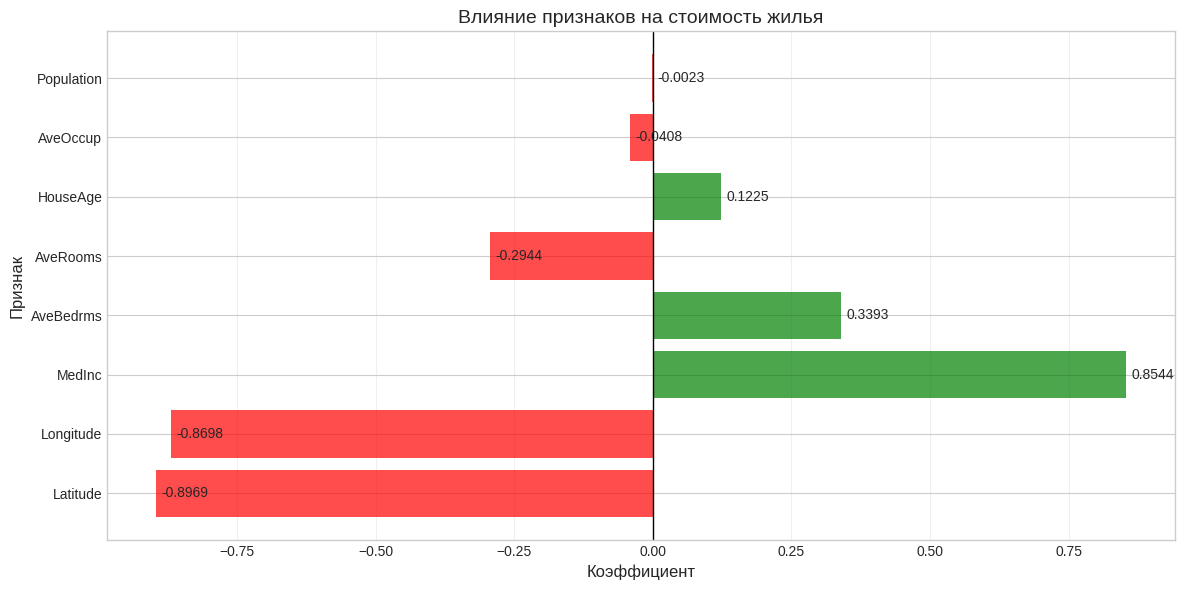


 Ключевые выводы:
1. Самый влиятельный признак: Latitude (коэф: -0.8969)
2. Наименее влиятельный признак: Population (коэф: -0.0023)
3. Положительных влияний: 3
4. Отрицательных влияний: 5


In [29]:
# Визуализация важности признаков
plt.figure(figsize=(12, 6))
colors = ['green' if coef > 0 else 'red' for coef in coef_df['Коэффициент']]
plt.barh(coef_df['Признак'], coef_df['Коэффициент'], color=colors, alpha=0.7)
plt.xlabel('Коэффициент', fontsize=12)
plt.ylabel('Признак', fontsize=12)
plt.title('Влияние признаков на стоимость жилья', fontsize=14)
plt.axvline(x=0, color='black', linestyle='-', linewidth=1)
plt.grid(True, alpha=0.3, axis='x')

for i, v in enumerate(coef_df['Коэффициент']):
    plt.text(v + 0.01, i, f'{v:.4f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

print("\n Ключевые выводы:")
print(f"1. Самый влиятельный признак: {coef_df.iloc[0]['Признак']} (коэф: {coef_df.iloc[0]['Коэффициент']:.4f})")
print(f"2. Наименее влиятельный признак: {coef_df.iloc[-1]['Признак']} (коэф: {coef_df.iloc[-1]['Коэффициент']:.4f})")
print(f"3. Положительных влияний: {sum(coef_df['Влияние'] == 'Положительное')}")
print(f"4. Отрицательных влияний: {sum(coef_df['Влияние'] == 'Отрицательное')}")

## Задание 8: Сравнительный анализ и выводы

ИТОГОВЫЙ СРАВНИТЕЛЬНЫЙ АНАЛИЗ
               Критерий Градиентный спуск Нормальное уравнение sklearn LinearRegression
         Точность (MSE)           Средняя              Высокая                  Высокая
      Скорость обучения         Медленная    Медленная (O(n³))                  Быстрая
Устойчивость к выбросам            Низкая               Низкая                   Низкая
       Масштабируемость           Высокая               Низкая                  Высокая
    Простота реализации           Средняя              Высокая                  Высокая

РЕКОМЕНДАЦИИ ПО ВЫБОРУ МЕТОДА

1. Для продакшена: sklearn LinearRegression
   - Оптимальное соотношение скорости и точности
   - Хорошо оптимизированная реализация

2. Для обучения: Градиентный спуск с нуля
   - Понимание внутренних механизмов работы
   - Гибкость в настройке гиперпараметров

3. Для небольших датасетов: Нормальное уравнение
   - Точное аналитическое решение
   - Не требует итераций

4. При наличии выбросов: HuberRegresso

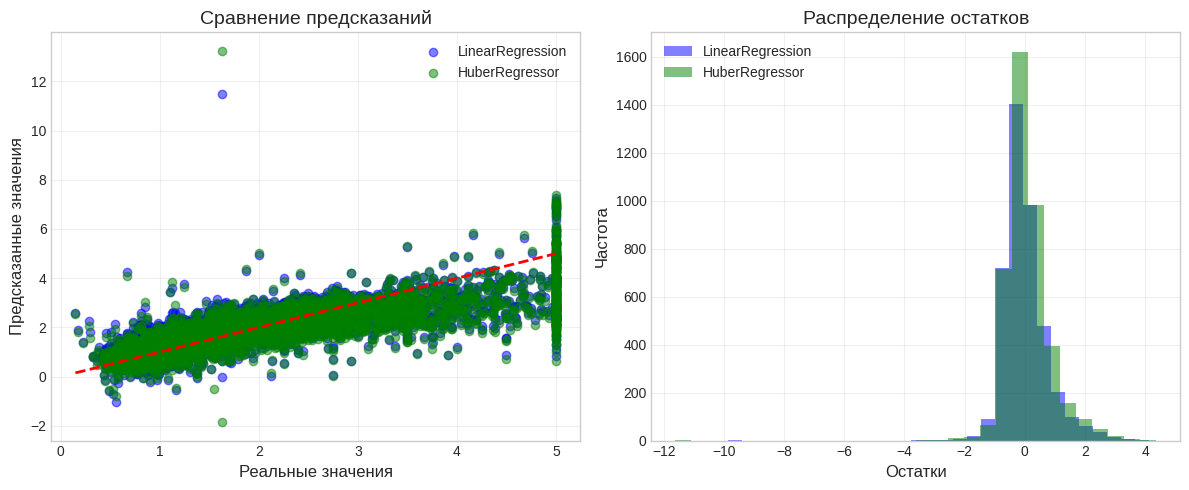

In [31]:
# Финальный сравнительный анализ
print("=" * 70)
print("ИТОГОВЫЙ СРАВНИТЕЛЬНЫЙ АНАЛИЗ")
print("=" * 70)

analysis = {
    'Критерий': ['Точность (MSE)', 'Скорость обучения', 'Устойчивость к выбросам',
                 'Масштабируемость', 'Простота реализации'],
    'Градиентный спуск': ['Средняя', 'Медленная', 'Низкая', 'Высокая', 'Средняя'],
    'Нормальное уравнение': ['Высокая', 'Медленная (O(n³))', 'Низкая', 'Низкая', 'Высокая'],
    'sklearn LinearRegression': ['Высокая', 'Быстрая', 'Низкая', 'Высокая', 'Высокая']
}

analysis_df = pd.DataFrame(analysis)
print(analysis_df.to_string(index=False))

print("\n" + "=" * 70)
print("РЕКОМЕНДАЦИИ ПО ВЫБОРУ МЕТОДА")
print("=" * 70)
print("""
1. Для продакшена: sklearn LinearRegression
   - Оптимальное соотношение скорости и точности
   - Хорошо оптимизированная реализация

2. Для обучения: Градиентный спуск с нуля
   - Понимание внутренних механизмов работы
   - Гибкость в настройке гиперпараметров

3. Для небольших датасетов: Нормальное уравнение
   - Точное аналитическое решение
   - Не требует итераций

4. При наличии выбросов: HuberRegressor
   - Устойчивость к аномалиям
   - Компромисс между MSE и MAE
""")


# Бонус: Сравнение с HuberRegressor (робастная регрессия)
print("\n" + "=" * 70)
print("СРАВНЕНИЕ С РОБАСТНОЙ РЕГРЕССИЕЙ (HuberRegressor)")
print("=" * 70)

huber_model = HuberRegressor(epsilon=1.35, max_iter=1000)
huber_model.fit(X_train_scaled, y_train)
huber_pred = huber_model.predict(X_test_scaled)

print(f"\nHuberRegressor MSE: {mean_squared_error(y_test, huber_pred):.4f}")
print(f"HuberRegressor R²:  {r2_score(y_test, huber_pred):.4f}")
print(f"LinearRegression MSE: {mse:.4f}")
print(f"LinearRegression R²:  {r2:.4f}")

# Визуализация сравнения
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5, label='LinearRegression', color='blue')
plt.scatter(y_test, huber_pred, alpha=0.5, label='HuberRegressor', color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Реальные значения', fontsize=12)
plt.ylabel('Предсказанные значения', fontsize=12)
plt.title('Сравнение предсказаний', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(y_test - y_pred, bins=30, alpha=0.5, label='LinearRegression', color='blue')
plt.hist(y_test - huber_pred, bins=30, alpha=0.5, label='HuberRegressor', color='green')
plt.xlabel('Остатки', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.title('Распределение остатков', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---

## Контрольные вопросы

1. **Почему масштабирование признаков критически важно для градиентного спуска?**
   - *Подсказка: Подумайте о скорости сходимости и величине градиентов*

2. **Как learning rate влияет на сходимость модели?**
   - *Подсказка: Что происходит при слишком большом/малом значении?*

3. **В чём преимущество нормального уравнения перед градиентным спуском?**
   - *Подсказка: Точность vs вычислительная сложность*

4. **Почему HuberRegressor более устойчив к выбросам?**
   - *Подсказка: Комбинация MSE и MAE*

5. **Как интерпретировать коэффициент признака в линейной регрессии?**
   - *Подсказка: Изменение y при изменении x на 1 единицу*

---

## Критерии оценки

| Критерий | Баллы | Требования |
|----------|-------|------------|
| Загрузка и подготовка данных | 10 | Правильное разделение и масштабирование |
| Реализация градиентного спуска | 25 | Корректные градиенты и обновление весов |
| Визуализация сходимости | 15 | Графики MSE и весов по эпохам |
| Сравнение трёх подходов | 20 | Таблица с метриками и временем |
| Анализ остатков | 15 | Гистограмма и проверка гомоскедастичности |
| Интерпретация коэффициентов | 10 | Анализ влияния признаков |
| Выводы и рекомендации | 5 | Обоснованные заключения |
| **Итого** | **100** | |


---

## Дополнительные материалы

### Рекомендуемая литература:
1. "Pattern Recognition and Machine Learning" — Christopher Bishop
2. "Hands-On Machine Learning" — Aurélien Géron
3. Документация scikit-learn: https://scikit-learn.org/

### Полезные ссылки:
- [Gradient Descent Visualization](https://mlu-explain.github.io/linear-regression/)
- [California Housing Dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html)
- [Linear Regression Theory](https://www.statisticshowto.com/probability-and-statistics/regression-analysis/)



---

## Советы по выполнению

1. **Экспериментируйте с learning rate**: Попробуйте значения от 0.001 до 0.1
2. **Следите за переобучением**: Сравнивайте метрики на train и test выборках
3. **Используйте визуализацию**: Графики помогают понять поведение модели
4. **Сохраняйте результаты**: Используйте pickle или joblib для сохранения моделей
5. **Документируйте код**: Добавляйте комментарии к сложным участкам

---

**Удачи в выполнении практической работы! **

# Практическое задание №3: Линейная регрессия и функции потерь

##  Общее описание задания

**Тема:** Исследование влияния функций потерь и гиперпараметров на качество линейной регрессии

**Цель:** Научиться применять линейную регрессию для решения задач прогнозирования, анализировать влияние выбросов, сравнивать различные функции потерь и подбирать оптимальные гиперпараметры.

**Необходимые библиотеки:**
```python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, HuberRegressor, SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
```

---

## Основные этапы выполнения

### Этап 1: Генерация и подготовка данных
1. Сгенерируйте синтетический датасет согласно вашему варианту
2. Добавьте шум и выбросы в соответствии с параметрами варианта
3. Разделите данные на обучающую и тестовую выборки (70/30)
4. Выполните масштабирование признаков

### Этап 2: Разведочный анализ данных (EDA)
1. Постройте матрицу корреляций признаков (heatmap)
2. Создайте pairplot для визуализации линейных зависимостей
3. Проанализируйте распределение целевой переменной
4. Выявите и визуализируйте выбросы

### Этап 3: Обучение моделей
1. Обучите три модели:
   - `LinearRegression` (минимизация MSE)
   - `HuberRegressor` с параметром `epsilon` из варианта
   - `SGDRegressor` с параметром `loss` из варианта
2. Зафиксируйте коэффициенты модели и свободный член

### Этап 4: Оценка качества
1. Рассчитайте метрики на тестовой выборке:
   - MSE, RMSE, MAE, R²
2. Постройте графики:
   - Фактические vs предсказанные значения
   - Остатки модели (residual plot)
   - Сравнение предсказаний трёх моделей

### Этап 5: Анализ устойчивости
1. Исследуйте влияние выбросов на каждую модель
2. Проанализируйте, как параметр `epsilon` влияет на робастность HuberRegressor
3. Сделайте выводы о применимости каждой функции потерь

### Этап 6: Отчёт
Подготовьте Jupyter Notebook с:
- [ ] Кодом с комментариями
- [ ] Визуализациями всех этапов
- [ ] Таблицей сравнения метрик
- [ ] Текстовыми выводами по каждому этапу


---

##  25 индивидуальных вариантов

| № | Целевая переменная | Признаки | Шум (σ) | % выбросов | Амплитуда выбросов | epsilon (Huber) | loss (SGD) | Learning rate | Итерации SGD |
|---|-------------------|----------|---------|------------|-------------------|-----------------|------------|---------------|--------------|
| 1 | price | [area, rooms] | 0.5 | 5% | ×3 | 1.35 | squared_loss | 0.01 | 1000 |
| 2 | salary | [experience, education] | 0.8 | 8% | ×4 | 1.5 | huber | 0.005 | 1500 |
| 3 | temperature | [humidity, pressure] | 1.0 | 10% | ×5 | 1.0 | squared_loss | 0.02 | 800 |
| 4 | sales | [ad_budget, season] | 0.3 | 3% | ×2 | 2.0 | epsilon_insensitive | 0.01 | 1200 |
| 5 | energy | [temp_out, occupancy] | 1.2 | 12% | ×6 | 1.35 | squared_loss | 0.001 | 2000 |
| 6 | rating | [reviews, price] | 0.6 | 6% | ×3.5 | 1.8 | huber | 0.015 | 1000 |
| 7 | delivery_time | [distance, weight] | 0.9 | 9% | ×4.5 | 1.2 | squared_loss | 0.02 | 900 |
| 8 | crop_yield | [rainfall, fertilizer] | 1.5 | 15% | ×7 | 1.35 | huber | 0.005 | 1500 |
| 9 | website_traffic | [seo_score, content_len] | 0.4 | 4% | ×2.5 | 2.5 | squared_loss | 0.01 | 1100 |
| 10 | patient_recovery | [age, treatment_days] | 1.1 | 11% | ×5.5 | 1.4 | epsilon_insensitive | 0.01 | 1300 |
| 11 | car_price | [mileage, year, power] | 0.7 | 7% | ×4 | 1.35 | squared_loss | 0.008 | 1400 |
| 12 | student_grade | [study_hours, attendance] | 0.5 | 5% | ×3 | 1.6 | huber | 0.012 | 1000 |
| 13 | electricity_cost | [usage, tariff, season] | 1.3 | 13% | ×6.5 | 1.1 | squared_loss | 0.02 | 850 |
| 14 | app_rating | [features, updates, support] | 0.8 | 8% | ×4 | 2.0 | huber | 0.005 | 1600 |
| 15 | house_rent | [area, metro_dist, floor] | 0.6 | 6% | ×3.5 | 1.35 | squared_loss | 0.015 | 1000 |
| 16 | production_output | [workers, hours, materials] | 1.4 | 14% | ×7 | 1.3 | epsilon_insensitive | 0.01 | 1200 |
| 17 | loan_amount | [income, credit_score, age] | 0.9 | 9% | ×4.5 | 1.7 | squared_loss | 0.007 | 1350 |
| 18 | fitness_score | [workouts, sleep, nutrition] | 1.0 | 10% | ×5 | 1.35 | huber | 0.01 | 1100 |
| 19 | stock_return | [volume, volatility, sector] | 1.6 | 16% | ×8 | 1.2 | squared_loss | 0.02 | 900 |
| 20 | customer_satisfaction | [wait_time, service_quality] | 0.5 | 5% | ×3 | 2.2 | huber | 0.005 | 1500 |
| 21 | fuel_consumption | [speed, load, terrain] | 1.1 | 11% | ×5.5 | 1.35 | squared_loss | 0.01 | 1250 |
| 22 | exam_score | [prep_time, previous_avg, stress] | 0.7 | 7% | ×4 | 1.5 | epsilon_insensitive | 0.015 | 1000 |
| 23 | server_response | [cpu_load, memory, requests] | 1.2 | 12% | ×6 | 1.35 | huber | 0.008 | 1400 |
| 24 | product_demand | [price, advertising, trend] | 0.8 | 8% | ×4 | 1.8 | squared_loss | 0.012 | 1150 |
| 25 | health_index | [exercise, diet, sleep, stress] | 1.0 | 10% | ×5 | 1.35 | huber | 0.01 | 1300 |

---

##  Технические требования к генерации данных

```python
def generate_dataset(n_samples=500, n_features=2, noise_std=0.5,
                     outlier_fraction=0.05, outlier_multiplier=3,
                     random_seed=None):
    """
    Генерация синтетического датасета для линейной регрессии
    
    Parameters:
    -----------
    n_samples : int - количество наблюдений
    n_features : int - количество признаков
    noise_std : float - стандартное отклонение шума
    outlier_fraction : float - доля выбросов (0.0-0.2)
    outlier_multiplier : float - множитель для выбросов
    random_seed : int - seed для воспроизводимости
    """
    if random_seed is not None:
        np.random.seed(random_seed)
    
    # Генерация признаков
    X = np.random.randn(n_samples, n_features)
    
    # Истинные коэффициенты
    true_coef = np.random.uniform(1, 5, n_features)
    true_intercept = np.random.uniform(0, 10)
    
    # Генерация целевой переменной
    y = X @ true_coef + true_intercept + np.random.randn(n_samples) * noise_std
    
    # Добавление выбросов
    n_outliers = int(n_samples * outlier_fraction)
    outlier_idx = np.random.choice(n_samples, n_outliers, replace=False)
    y[outlier_idx] += np.random.choice([-1, 1], n_outliers) * \
                      np.random.uniform(3, 10, n_outliers) * outlier_multiplier
    
    return X, y, true_coef, true_intercept
```

---

##  Требования к визуализациям

### Обязательные графики:
1. **Heatmap корреляций** — с аннотацией значений
2. **Pairplot** — для первых 3 признаков + target
3. **Scatter plot с линией регрессии** — для каждой модели
4. **Residual plot** — остатки vs предсказания
5. **Сравнение метрик** — bar plot для MSE, MAE, R²
6. **Влияние epsilon** — график метрик Huber в зависимости от epsilon

### Дополнительные:
- Анимация сходимости градиентного спуска
- 3D-визуализация для 2 признаков
- Конфиденциальные интервалы предсказаний

---

##  Контрольные вопросы

1. Почему MSE более чувствительна к выбросам, чем MAE? Приведите математическое обоснование через производные.

2. Как параметр `epsilon` в Huber loss влияет на поведение модели? При каких значениях она ведёт себя как MSE, а при каких — как MAE?

3. Почему масштабирование признаков важно для SGDRegressor? Что произойдёт, если признаки имеют разный масштаб?

4. В каких практических задачах предпочтительнее использовать Huber loss вместо MSE? Приведите 2-3 примера.

5. Как интерпретировать отрицательное значение R²? О чём это говорит о модели?

6. Почему при увеличении learning rate модель может "разойтись"? Проиллюстрируйте на примере формулы обновления весов.

7. Как наличие мультиколлинеарности влияет на коэффициенты линейной регрессии? Как это можно обнаружить?

8. В чём разница между стохастическим, мини-батч и пакетным градиентным спуском? Когда какой использовать?

---

## Критерии оценки

| Критерий | Баллы | Описание |
|----------|-------|----------|
| Корректность кода | 25 | Код выполняется без ошибок, соответствует ТЗ |
| Качество визуализаций | 20 | Графики информативны, подписаны, эстетичны |
| Анализ результатов | 25 | Глубокий анализ, обоснованные выводы |
| Ответы на вопросы | 15 | Полные, точные, с примерами |
| Оформление отчёта | 10 | Структура, комментарии, читаемость |
| **Итого** | **95** | +5 бонусных за креативность/доп. анализ |

**Шкала оценок:**
- 85-100: Отлично
- 70-84: Хорошо
- 55-69: Удовлетворительно
- <55: Требуется доработка

---

##  Подсказки для студентов

###  Подсказка 1: Генерация данных
```python
# Используйте вариант студента для random_seed
X, y, true_w, true_b = generate_dataset(
    n_samples=500,
    n_features=len(features),  # из варианта
    noise_std=0.5,  # из варианта
    outlier_fraction=0.05,  # из варианта
    outlier_multiplier=3,  # из варианта
    random_seed=student_id  # уникальный seed
)
```

###  Подсказка 2: Обучение HuberRegressor
```python
from sklearn.linear_model import HuberRegressor

# epsilon из вашего варианта
model_huber = HuberRegressor(epsilon=1.35, max_iter=1000)
model_huber.fit(X_train_scaled, y_train)

# Анализ коэффициентов
print(f"Истинные веса: {true_w}")
print(f"Huber веса: {model_huber.coef_}")
```

###  Подсказка 3: Сравнение метрик
```python
def compare_models(models_dict, X_test, y_test):
    results = []
    for name, model in models_dict.items():
        y_pred = model.predict(X_test)
        results.append({
            'Model': name,
            'MSE': mean_squared_error(y_test, y_pred),
            'MAE': mean_absolute_error(y_test, y_pred),
            'R2': r2_score(y_test, y_pred)
        })
    return pd.DataFrame(results)
```

### Подсказка 4: Residual plot
```python
def plot_residuals(y_true, y_pred, title="Residual Plot"):
    residuals = y_true - y_pred
    plt.figure(figsize=(8, 5))
    plt.scatter(y_pred, residuals, alpha=0.6)
    plt.axhline(0, color='red', linestyle='--', linewidth=1)
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.title(title)
    plt.grid(alpha=0.3)
    plt.show()
```

---

##  Рекомендуемые ресурсы

1.  [Scikit-learn: Linear Models](https://scikit-learn.org/stable/modules/linear_model.html)
2.  [Understanding the Bias-Variance Tradeoff](https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-2676c8f4f6d9)
3.  [Huber Loss Explained](https://medium.com/@pushkarmandot/huber-loss-4d6d2f2c6c2e)
4.  [Gradient Descent Visualized](https://www.youtube.com/watch?v=sDv4f4s2SB8)
5.  [Kaggle: Linear Regression Tutorial](https://www.kaggle.com/code/alexanderkuk/linear-regression-lesson-1)

---

##  Важные замечания

 **Разрешено:**
- Использовать готовые функции sklearn
- Копировать код из лекции с указанием источника
- Обсуждать общие подходы с одногруппниками

 **Запрещено:**
- Копировать готовые решения у других студентов
- Использовать AI для генерации финального отчёта
- Подделывать результаты или метрики

 **Срок сдачи:** 1 неделя с момента выдачи задания  
 **Формат сдачи:** Jupyter Notebook (.ipynb) + отчёт  
 **Куда сдавать:** Github репозиторий

